# Classification Models

## Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nbimporter

import TrainTestEvalSplit as split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#Classification Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from yellowbrick.classifier import ClassPredictionError

## Import File

In [2]:
full_df = pd.read_csv("../../../Data_thesis/Full_Datasets/Full.csv")
full_df["Date"] = pd.to_datetime(full_df["Date"], format="%Y-%m-%d")

full_df.head()

,Date,Hour,Nieuwmarkt Arrivals,Nieuwezijds Kolk Arrivals,Dam Arrivals,Spui Arrivals,Nieuwmarkt Departures,Nieuwezijds Kolk Departures,Dam Departures,Spui Departures,...,SensorLatitude,CrowdednessCount,is_event,Year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos
0,2018-03-11,100,0.0,0.0,13.0,0.0,0.0,0.0,90.0,0.0,...,5,886,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,0.258819,0.965926
1,2018-03-11,2100,136.0,80.0,409.0,40.0,211.0,119.0,858.0,94.0,...,7,1603,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-0.707107,0.707107
2,2018-03-11,2100,136.0,80.0,409.0,40.0,211.0,119.0,858.0,94.0,...,0,21,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-0.707107,0.707107
3,2018-03-11,2100,136.0,80.0,409.0,40.0,211.0,119.0,858.0,94.0,...,9,88,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-0.707107,0.707107
4,2018-03-11,2100,136.0,80.0,409.0,40.0,211.0,119.0,858.0,94.0,...,2,49,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-0.707107,0.707107


## Train/Test/Eval

In [3]:
size = 0.9
split_date = pd.Timestamp(2018, 12, 31)
sensor = "GAWW-02"
eval_start_date = pd.Timestamp(2019, 1, 1)
eval_end_date = pd.Timestamp(2019, 1, 31)

In [6]:
full_df = split.clasCrowdednessCounts(full_df)

In [8]:
x_train, y_train, x_test, y_test, x_test_series, y_test_series, feature_labels = split.trainTestSplit(full_df, size, split_date, sensor)

In [9]:
x_eval, y_eval, x_eval_series, y_eval_series = split.evalSplit(full_df, split_date, sensor, eval_start_date, eval_end_date)

## Models

### Baseline
Implemented the [Sklearn Version](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier)

#### Training

In [14]:
bas = DummyClassifier(strategy="stratified", random_state=42)
bas.fit(x_train, y_train)

DummyClassifier(constant=None, random_state=42, strategy='stratified')

#### Test

Accuracy Score:  0.25098185224775105
              precision    recall  f1-score   support

           1       0.24      0.24      0.24     19519
           2       0.26      0.26      0.26     21741
           3       0.24      0.24      0.24     19702
           4       0.27      0.27      0.27     22299

   micro avg       0.25      0.25      0.25     83261
   macro avg       0.25      0.25      0.25     83261
weighted avg       0.25      0.25      0.25     83261



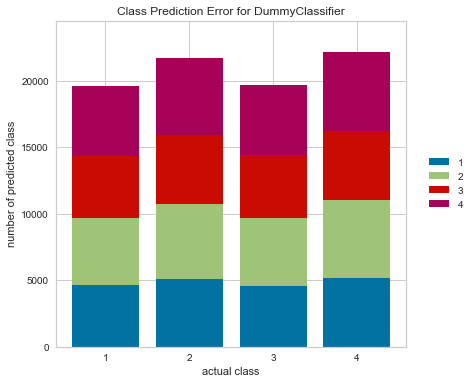

In [19]:
y_pred_test_bas = bas.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_test_bas))
print(classification_report(y_test, y_pred_test_bas))

visualizer = ClassPredictionError(
    bas
)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

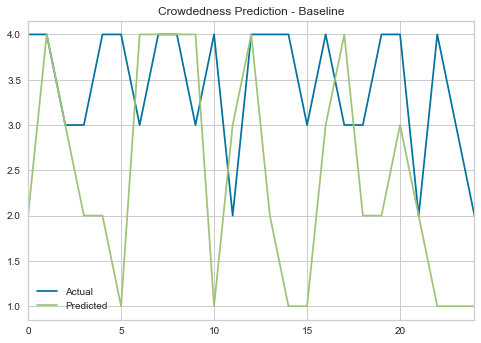

In [20]:
#Time series
time_pred_test_bas = bas.predict(x_test_series)

time_pred_series_test_bas = pd.Series(time_pred_test_bas)
time_real_series_test_bas = pd.Series(y_test_series)

time_real_series_test_bas.plot(legend=True, label="Actual")
time_pred_series_test_bas.plot(legend=True, title='Crowdedness Prediction - Baseline', label="Predicted")
plt.show()

#### Evaluation

Accuracy Score:  0.2446924603174603
              precision    recall  f1-score   support

           1       0.29      0.24      0.26      5860
           2       0.23      0.26      0.25      4562
           3       0.30      0.23      0.26      6172
           4       0.17      0.26      0.21      3566

   micro avg       0.24      0.24      0.24     20160
   macro avg       0.25      0.25      0.24     20160
weighted avg       0.26      0.24      0.25     20160



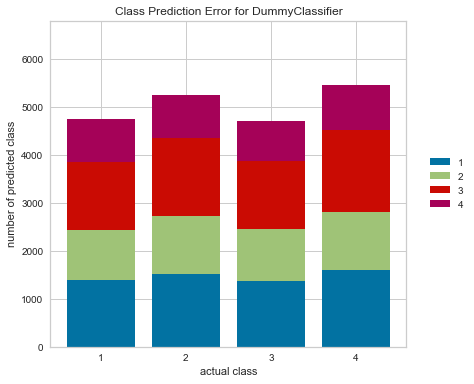

In [21]:
y_pred_eval_bas = bas.predict(x_eval)

print("Accuracy Score: ", accuracy_score(y_eval, y_pred_eval_bas))
print(classification_report(y_eval, y_pred_eval_bas))

visualizer = ClassPredictionError(
    bas
)

visualizer.fit(x_train, y_train)
visualizer.score(x_eval, y_eval)
g = visualizer.poof()

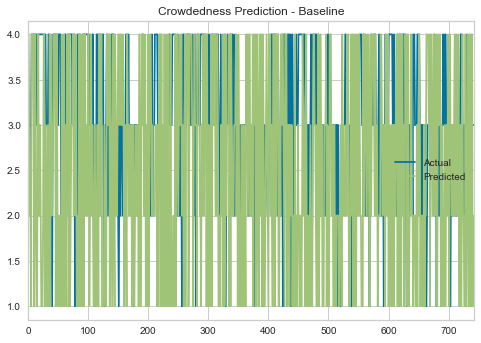

In [23]:
#Time series
time_pred_eval_bas = bas.predict(x_eval_series)

time_pred_series_eval_bas = pd.Series(time_pred_eval_bas)
time_real_series_eval_bas = pd.Series(y_eval_series)

time_real_series_eval_bas.plot(legend=True, label="Actual")
time_pred_series_eval_bas.plot(legend=True, title='Crowdedness Prediction - Baseline', label="Predicted")
plt.show()

### Logistic Regression
Implemented the [Sklearn Version](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

#### Training

In [42]:
lr = LogisticRegression(penalty="l2", class_weight="balanced", random_state=42, solver="newton-cg", max_iter=150,
                       multi_class="multinomial", n_jobs=20)

lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=150,
          multi_class='multinomial', n_jobs=20, penalty='l2',
          random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

#### Test

Accuracy Score:  0.5047381126818078
              precision    recall  f1-score   support

           1       0.47      0.51      0.49     19519
           2       0.45      0.34      0.39     21741
           3       0.49      0.46      0.47     19702
           4       0.58      0.70      0.64     22299

   micro avg       0.50      0.50      0.50     83261
   macro avg       0.50      0.50      0.50     83261
weighted avg       0.50      0.50      0.50     83261



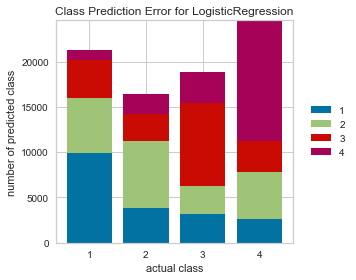

In [43]:
y_pred_test_lr = lr.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_test_lr))
print(classification_report(y_test, y_pred_test_lr))

visualizer = ClassPredictionError(
    lr
)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

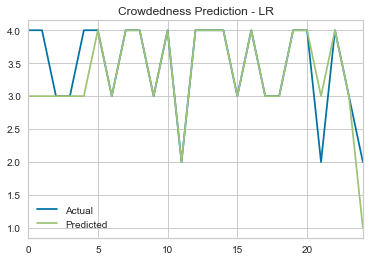

In [46]:
#Time series
time_pred_test_lr = lr.predict(x_test_series)

time_pred_series_test_lr = pd.Series(time_pred_test_lr)
time_real_series_test_lr = pd.Series(y_test_series)

time_real_series_test_lr.plot(legend=True, label="Actual")
time_pred_series_test_lr.plot(legend=True, title='Crowdedness Prediction - LR', label="Predicted")
plt.show()

#### Evaluation

Accuracy Score:  0.4349702380952381
              precision    recall  f1-score   support

           1       0.45      0.54      0.49      5860
           2       0.27      0.31      0.29      4562
           3       0.55      0.36      0.43      6172
           4       0.49      0.57      0.53      3566

   micro avg       0.43      0.43      0.43     20160
   macro avg       0.44      0.44      0.44     20160
weighted avg       0.45      0.43      0.43     20160



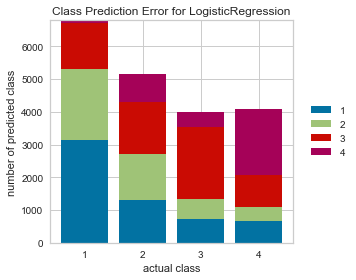

In [45]:
y_pred_eval_lr = lr.predict(x_eval)

print("Accuracy Score: ", accuracy_score(y_eval, y_pred_eval_lr))
print(classification_report(y_eval, y_pred_eval_lr))

visualizer = ClassPredictionError(
    lr
)

visualizer.fit(x_train, y_train)
visualizer.score(x_eval, y_eval)
g = visualizer.poof()

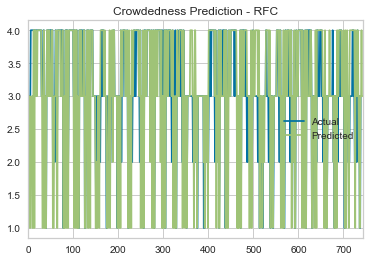

In [47]:
#Time series
time_pred_eval_lr = lr.predict(x_eval_series)

time_pred_series_eval_lr = pd.Series(time_pred_eval_lr)
time_real_series_eval_lr = pd.Series(y_eval_series)

time_real_series_eval_lr.plot(legend=True, label="Actual")
time_pred_series_eval_lr.plot(legend=True, title='Crowdedness Prediction - RFC', label="Predicted")
plt.show()

### Random Forrest Classifier 
Implemented the [Sklearn Version](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

#### Training

In [26]:
rfc = RandomForestClassifier(n_estimators=300, criterion="entropy", n_jobs=50, random_state=42, 
                                  class_weight="balanced", oob_score="True")

rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=50, oob_score='True', random_state=42,
            verbose=0, warm_start=False)

#### Test

Accuracy Score:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     19519
           2       1.00      1.00      1.00     21741
           3       1.00      1.00      1.00     19702
           4       1.00      1.00      1.00     22299

   micro avg       1.00      1.00      1.00     83261
   macro avg       1.00      1.00      1.00     83261
weighted avg       1.00      1.00      1.00     83261



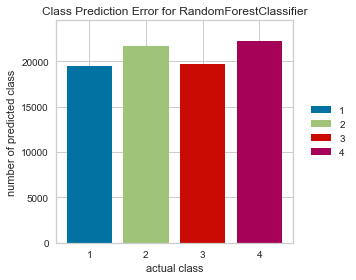

In [27]:
y_pred_test_rfc = rfc.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_test_rfc))
print(classification_report(y_test, y_pred_test_rfc))

visualizer = ClassPredictionError(
    rfc
)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

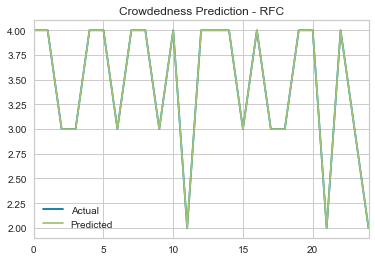

In [35]:
#Time series
time_pred_test_rfc = rfc.predict(x_test_series)

time_pred_series_test_rfc = pd.Series(time_pred_test_rfc)
time_real_series_test_rfc = pd.Series(y_test_series)

time_real_series_test_rfc.plot(legend=True, label="Actual")
time_pred_series_test_rfc.plot(legend=True, title='Crowdedness Prediction - RFC', label="Predicted")
plt.show()

#### Evaluation

Accuracy Score:  0.7228174603174603
              precision    recall  f1-score   support

           1       0.84      0.71      0.77      5860
           2       0.60      0.70      0.65      4562
           3       0.81      0.66      0.73      6172
           4       0.64      0.88      0.74      3566

   micro avg       0.72      0.72      0.72     20160
   macro avg       0.72      0.74      0.72     20160
weighted avg       0.74      0.72      0.72     20160



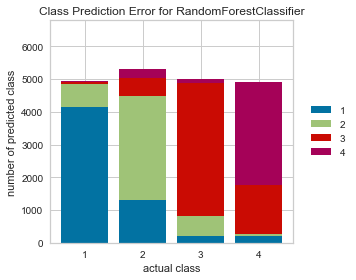

In [29]:
y_pred_eval_rfc = rfc.predict(x_eval)

print("Accuracy Score: ", accuracy_score(y_eval, y_pred_eval_rfc))
print(classification_report(y_eval, y_pred_eval_rfc))

visualizer = ClassPredictionError(
    rfc
)

visualizer.fit(x_train, y_train)
visualizer.score(x_eval, y_eval)
g = visualizer.poof()

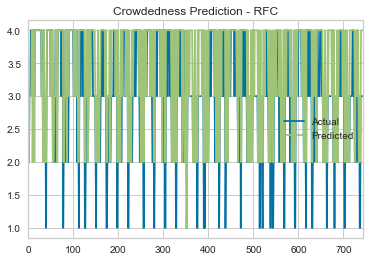

In [36]:
#Time series
time_pred_eval_rfc = rfc.predict(x_eval_series)

time_pred_series_eval_rfc = pd.Series(time_pred_eval_rfc)
time_real_series_eval_rfc = pd.Series(y_eval_series)

time_real_series_eval_rfc.plot(legend=True, label="Actual")
time_pred_series_eval_rfc.plot(legend=True, title='Crowdedness Prediction - RFC', label="Predicted")
plt.show()

### XGBoost 
Implement [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_intro.html)

#### Training

In [33]:
xgb = xgb.XGBClassifier(random_state=42, n_estimators=300, max_depth=12, 
                              learning_rate=0.1, booster="gbtree", n_jobs=50)

xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=50, nthread=None, objective='multi:softprob',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

#### Test

Accuracy Score:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     19519
           2       1.00      1.00      1.00     21741
           3       1.00      1.00      1.00     19702
           4       1.00      1.00      1.00     22299

   micro avg       1.00      1.00      1.00     83261
   macro avg       1.00      1.00      1.00     83261
weighted avg       1.00      1.00      1.00     83261



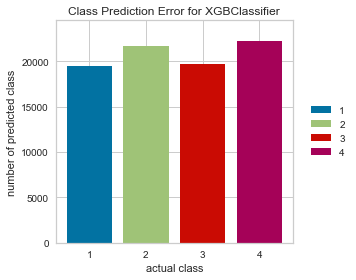

In [34]:
y_pred_test_xgb = xgb.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))

visualizer = ClassPredictionError(
    xgb
)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

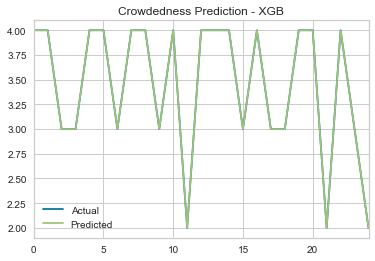

In [37]:
#Time series
time_pred_test_xgb = xgb.predict(x_test_series)

time_pred_series_test_xgb = pd.Series(time_pred_test_xgb)
time_real_series_test_xgb = pd.Series(y_test_series)

time_real_series_test_xgb.plot(legend=True, label="Actual")
time_pred_series_test_xgb.plot(legend=True, title='Crowdedness Prediction - XGB', label="Predicted")
plt.show()

#### Evaluation

Accuracy Score:  0.6788690476190476
              precision    recall  f1-score   support

           1       0.73      0.70      0.71      5860
           2       0.55      0.66      0.60      4562
           3       0.80      0.60      0.69      6172
           4       0.65      0.81      0.72      3566

   micro avg       0.68      0.68      0.68     20160
   macro avg       0.68      0.69      0.68     20160
weighted avg       0.70      0.68      0.68     20160



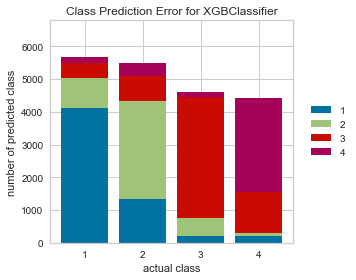

In [38]:
y_pred_eval_xgb = xgb.predict(x_eval)

print("Accuracy Score: ", accuracy_score(y_eval, y_pred_eval_xgb))
print(classification_report(y_eval, y_pred_eval_xgb))

visualizer = ClassPredictionError(
    xgb
)

visualizer.fit(x_train, y_train)
visualizer.score(x_eval, y_eval)
g = visualizer.poof()

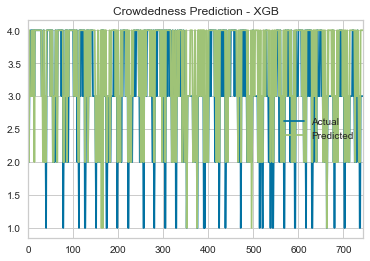

In [39]:
#Time series
time_pred_eval_xgb = xgb.predict(x_eval_series)

time_pred_series_eval_xgb = pd.Series(time_pred_eval_xgb)
time_real_series_eval_xgb = pd.Series(y_eval_series)

time_real_series_eval_xgb.plot(legend=True, label="Actual")
time_pred_series_eval_xgb.plot(legend=True, title='Crowdedness Prediction - XGB', label="Predicted")
plt.show()